In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/bert/FINBERT.csv", sep=',', decimal=',', index_col=0)

df['weekday'] = pd.to_datetime(df['date'], format="%Y/%m/%d").dt.dayofweek

df.drop(columns = ['date', 'median', 'median_5_days', 'diff_medians'], inplace=True)
df

diff_medians%  count_news  count_source        neutral_title  \
0       0.5525550251846307           1             1                  0.0   
1       0.8039803113576126          80            15                 0.65   
2    -0.019414643708030786         144            15   0.5208333333333334   
3     -0.17820541920597727         137            17  0.48175182481751827   
4      -1.4805835939384415         118            15   0.5338983050847458   
..                     ...         ...           ...                  ...   
247    -2.1432370177972118          32             6               0.5625   
248    -0.4459654607639753          55             9    0.509090909090909   
249  -0.011876776247709674          64            10               0.5625   
250     1.1046553096127891          47            10   0.5319148936170213   
251    -1.6590076026035028          31             5   0.3548387096774194   

     neutral_description       positive_title positive_description  \
0                    0.0                  1.0                  1.0   
1                   0.65               0.2125                0.125   
2     0.5416666666666666   0.3333333333333333   0.3194444444444444   
3    0.45985401459854014  0.39416058394160586   0.3284671532846715   
4      0.576271186440678  0.23728813559322035   0.2288135593220339   
..                   ...                  ...                  ...   
247              0.46875              0.34375               0.4375   
248  0.43636363636363634  0.36363636363636365   0.3090909090909091   
249             0.484375             0.203125             0.140625   
250  0.44680851063829785   0.2978723404255319   0.2978723404255319   
251   0.3225806451612903  0.25806451612903225  0.45161290322580644   

          negative_title negative_description  weekday  
0                    0.0                  0.0        4  
1                 0.1375                0.225        1  
2    0.14583333333333334                0.125        2  
3    0.12408759124087591  0.20437956204379562        3  
4     0.2288135593220339   0.1864406779661017        4  
..                   ...                  ...      ...  
247              0.09375              0.09375        0  
248  0.12727272727272726  0.23636363636363636        1  
249             0.234375             0.359375        2  
250   0.1702127659574468   0.2553191489361702        3  
251   0.3870967741935484  0.22580645161290322        4  

[252 rows x 10 columns]

In [ ]:
df.dtypes

diff_medians%           object
count_news               int64
count_source             int64
neutral_title           object
neutral_description     object
positive_title          object
positive_description    object
negative_title          object
negative_description    object
dtype: object

In [ ]:
for col in df.columns:
  df[col] = df[col].astype(float)

In [ ]:
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

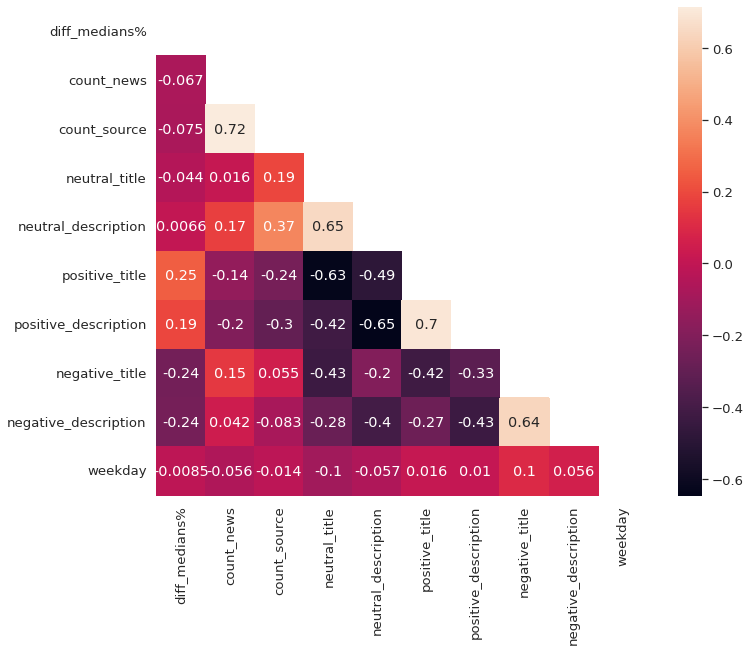

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
corrMatrix = df.corr()
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
sns.heatmap(corrMatrix, mask=mask, annot=True)
plt.show()

In [ ]:
df1 = df.drop(columns = ['weekday', 'neutral_description', 'neutral_title', 'count_news', 'negative_title', 'positive_title'])

Задача регрессии

In [ ]:
# Model functions
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Statistics functions
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# Functions to calculate Mean Absolute Error (MAE) and Mean Squared Error (MSE)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Function to split data into different groups
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold

In [ ]:
# Model functions
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Define models
model_lin = LinearRegression()
model_ran = RandomForestRegressor()
model_xg = XGBRegressor()

from sklearn.metrics import mean_squared_error, r2_score

# Define a function for each metric R²
def rsqr_score(test, pred):
    r2_ = r2_score(test, pred)
    return r2_

# RMSE
def rmse_score(test, pred):
    rmse_ = np.sqrt(mean_squared_error(test, pred))
    return rmse_

In [ ]:
y = df1['diff_medians%']
X = df1.drop(['diff_medians%'], axis=1)

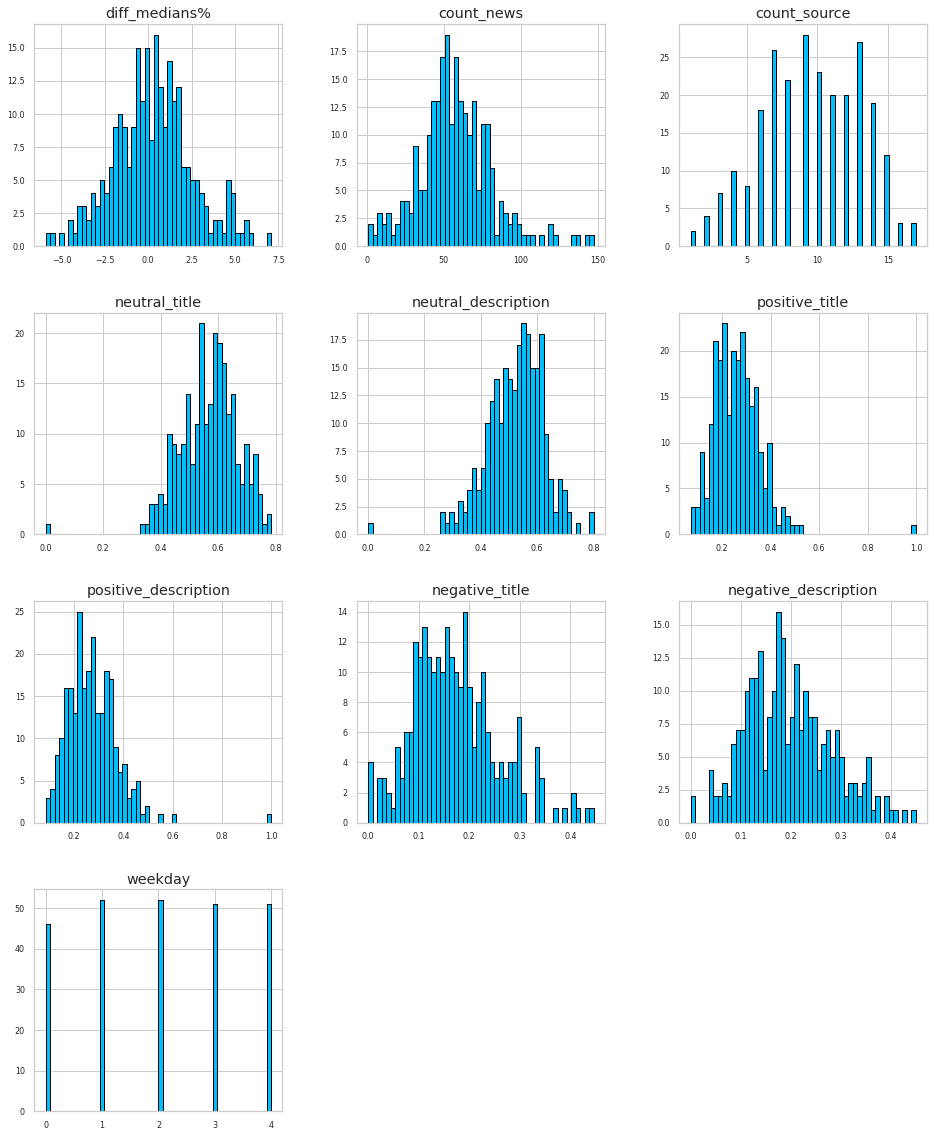

In [ ]:
# Plot the distribution of all the numerical features
fig_ = df.hist(figsize=(16, 20), bins=50, color="deepskyblue",
                           edgecolor="black", xlabelsize=8, ylabelsize=8)

In [ ]:
# Drop any quasi-constant features where 95% of the values are similar or constant
sel = VarianceThreshold(threshold=0.01) # 0.05: drop column where 95% of the values are constant

# The fit finds the features with constant variance
sel.fit(df1.iloc[:, 1:])

# Get the number of features that are not constant
print(f"Number of retained features: {sum(sel.get_support())}")
print(f"\nNumber of quasi_constant features: {len(df1.iloc[:, 1:].columns) - sum(sel.get_support())}")

quasi_constant_features_list = [x for x in df1.iloc[:, 1:].columns if x not in df1.iloc[:, 1:].columns[sel.get_support()]]

print(f"\nQuasi-constant features to be dropped: {quasi_constant_features_list}")

Number of retained features: 2

Number of quasi_constant features: 1

Quasi-constant features to be dropped: ['negative_description']


In [ ]:
## splitting the data for training and testing and cleaning it using imputation 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
print(f"\nX_test:{X_test.shape}\ny_test:{y_test.shape}")

X_train:(201, 3)
y_train:(201,)

X_test:(51, 3)
y_test:(51,)


For this project, six supervised learning models will be considered:

Linear Regression
Ridge Regression
Lasso Regression
Decision Tree Regressor
Random Forest Regressor
XGBoost Regressor
To measure model performance and their predicitons the RMSE and R^{2} scores will be used, and 5-fold cross-validation will also be used.

In [ ]:
# Define models
model_lin = LinearRegression(normalize=True)
model_ridge = Ridge(alpha = 0.001)
model_lasso = Lasso(alpha = 0.001)
model_tree = DecisionTreeRegressor()
model_ran = RandomForestRegressor()
model_xg = XGBRegressor()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Define a function for each metric
# R²
def rsqr_score(test, pred):
    """Calculate R squared score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        R squared score 
    """
    r2_ = r2_score(test, pred)
    return r2_


# RMSE
def rmse_score(test, pred):
    """Calculate Root Mean Square Error score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        Root Mean Square Error score
    """
    rmse_ = np.sqrt(mean_squared_error(test, pred))
    return rmse_


# Print the scores
def print_score(test, pred, model):
    """Print calculated score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        print the regressor name
        print the R squared score
        print Root Mean Square Error score
    """

    print(f"- Regressor: {model}")
    print(f"R²: {rsqr_score(test, pred)}")
    print(f"RMSE: {rmse_score(test, pred)}\n")

Linear Regression

In [ ]:
scores_lin = -1 * cross_val_score(model_lin, X_train, y_train,
                                  cv=5,
                                  scoring='neg_mean_squared_error')

print("MSE scores (Linear Model):\n", scores_lin)
print("Mean MSE scores:", scores_lin.mean())

MSE scores (Linear Model):
 [4.4708699  4.33168577 5.72850508 5.87201984 5.53446661]
Mean MSE scores: 5.187509442461806


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

In [ ]:
model_lin.fit(X_train, y_train)
y_pred_lin = model_lin.predict(X_test)
print_score(y_test, y_pred_lin, "Linear")

- Regressor: Linear
R²: 0.012659701117653799
RMSE: 1.9667745911546293



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


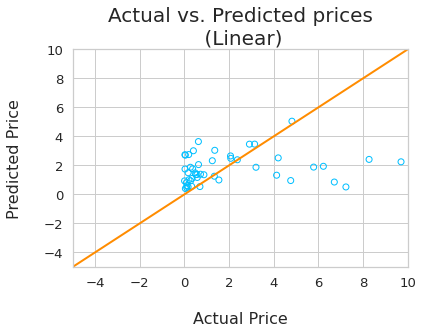

In [ ]:
plt.figure()
plt.title("Actual vs. Predicted prices\n (Linear)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_lin),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([-10, 10], [-10, 10], "darkorange", lw=2)
plt.xlim(-5, 10)
plt.ylim(-5, 10)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

Decision Tree Regressor

In [ ]:
scores_tree = -1 * cross_val_score(model_tree, X_train, y_train,
                                   cv=5,
                                   scoring='neg_mean_squared_error')

print("MSE scores (Decision Tree Model):\n", scores_tree)
print("Mean MSE scores:", scores_tree.mean())

MSE scores (Decision Tree Model):
 [10.8885467   9.00554963  8.82410647  8.17680699 12.1027338 ]
Mean MSE scores: 9.799548716710094


In [ ]:
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)
print_score(y_test, y_pred_tree, "Decision Tree")

- Regressor: Decision Tree
R²: -0.9466158353264826
RMSE: 2.7616032381930897



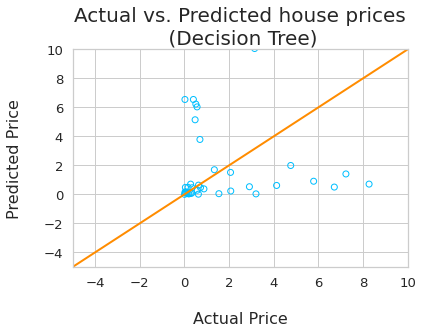

In [ ]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (Decision Tree)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_tree),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([-10, 10], [-10, 10], "darkorange", lw=2)
plt.xlim(-5, 10)
plt.ylim(-5, 10)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

Random Forest Regressor

In [ ]:
scores_ran = -1 * cross_val_score(model_ran, X_train, y_train,
                                  cv=5,
                                  scoring='neg_mean_squared_error')

print("MSE scores (Random Forest Model):\n", scores_ran)
print("Mean MSE scores:", scores_ran.mean())

MSE scores (Random Forest Model):
 [5.52020931 4.13051456 5.52851781 6.9349783  6.61906939]
Mean MSE scores: 5.746657873739563


In [ ]:
model_ran.fit(X_train, y_train)
y_pred_ran = model_ran.predict(X_test)
print_score(y_test, y_pred_ran, "Random Forest")

- Regressor: Random Forest
R²: 0.09864068212597055
RMSE: 1.8791875808805627



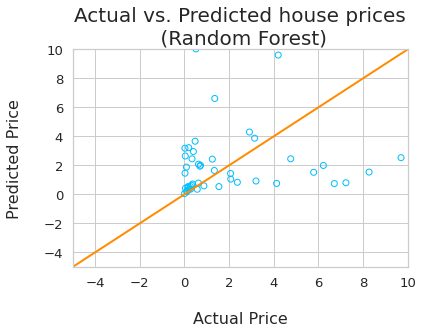

In [ ]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (Random Forest)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_ran),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([-10, 10], [-10, 10], "darkorange", lw=2)
plt.xlim(-5, 10)
plt.ylim(-5, 10)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

XGBoost Regression

In [ ]:
# Define hyperparameters
tuned_parameters_xgb = {"max_depth": [3],
                        "colsample_bytree": [0.3, 0.7],
                        "learning_rate": [0.01, 0.05, 0.1],
                        "n_estimators": [100, 500, 1000]}

# GridSearch
xgbr_cv = GridSearchCV(estimator=XGBRegressor(),
                       param_grid=tuned_parameters_xgb,
                       cv=5,
                       n_jobs=-1,
                       verbose=1)

# fit the GridSearch on train set
xgbr_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {xgbr_cv.best_params_}\n")
print(f"Best R²: {xgbr_cv.best_score_}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[21:16:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best hyperparameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

Best R²: 0.014411954041257035


In [ ]:
model_xgb_opt = XGBRegressor(colsample_bytree = xgbr_cv.best_params_["colsample_bytree"],
                             learning_rate = xgbr_cv.best_params_["learning_rate"],
                             max_depth = xgbr_cv.best_params_["max_depth"],
                             n_estimators = xgbr_cv.best_params_["n_estimators"])

model_xgb_opt.fit(X_train, y_train)
y_pred_xgb_opt = model_xgb_opt.predict(X_test)
print_score(y_test, y_pred_xgb_opt, "XGBoost")

[21:16:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
- Regressor: XGBoost
R²: 0.07852251363105789
RMSE: 1.9000434032491693



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

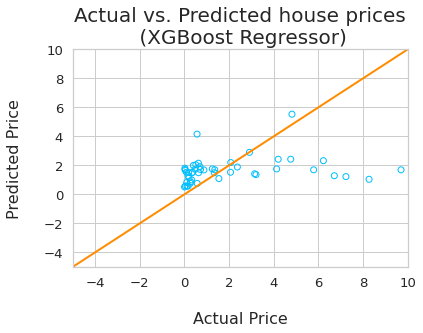

In [ ]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (XGBoost Regressor)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_xgb_opt),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([-10, 10], [-10, 10], "darkorange", lw=2)
plt.xlim(-5, 10)
plt.ylim(-5, 10)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

Ridge

In [ ]:
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)
print_score(y_test, y_pred_ridge, "Ridge")

- Regressor: Ridge
R²: 0.001656786348054995
RMSE: 1.9777030912468494



Lasso

In [ ]:
# Define hyperparameters
alphas = np.linspace(0, 10, 100).tolist()

tuned_parameters = {"alpha": alphas}

# GridSearch
ridge_cv = GridSearchCV(Ridge(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
ridge_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {ridge_cv.best_params_}")
print(f"Best R² (train): {ridge_cv.best_score_}")

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best hyperparameters: {'alpha': 1.0101010101010102}
Best R² (train): -0.009439901300070563


In [ ]:
model_ridge_opt = Ridge(alpha = ridge_cv.best_params_["alpha"])
model_ridge_opt.fit(X_train, y_train)
y_pred_ridge_opt = model_ridge_opt.predict(X_test)
print_score(y_test, y_pred_ridge_opt, "Ridge")

- Regressor: Ridge
R²: 0.016349902308064435
RMSE: 1.963095723706078

